In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

max_features = 15000
maxlen = 600
vector_size = 8

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(x_train.shape)
print(x_test.shape)

review = x_train[0]

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) #truncates the content
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print(x_train.shape)
print(x_test.shape)

processed_review = x_train[0]

print(review)
print(processed_review)


(25000,)
(25000,)
(25000, 600)
(25000, 600)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[    0  

In [2]:
from tensorflow.keras import models, layers

In [3]:
model = models.Sequential()
model.add(layers.Embedding(
    max_features, 
    vector_size, 
    input_length=maxlen
))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.summary()

W0723 11:50:32.399629 4582790592 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0723 11:50:32.420222 4582790592 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0723 11:50:32.460572 4582790592 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) i

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 8)            120000    
_________________________________________________________________
flatten (Flatten)            (None, 4800)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 4801      
Total params: 124,801
Trainable params: 124,801
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train, epochs=7, batch_size=128, validation_split=0.01)

Train on 24750 samples, validate on 250 samples
Epoch 1/7
24750/24750 [==============================] - 1s 42us/sample - loss: 0.6421 - acc: 0.6600 - val_loss: 0.5021 - val_acc: 0.8040
Epoch 2/7
24750/24750 [==============================] - 1s 40us/sample - loss: 0.3847 - acc: 0.8636 - val_loss: 0.3059 - val_acc: 0.8920
Epoch 3/7
24750/24750 [==============================] - 1s 39us/sample - loss: 0.2639 - acc: 0.9027 - val_loss: 0.2590 - val_acc: 0.9240
Epoch 4/7
24750/24750 [==============================] - 1s 38us/sample - loss: 0.2138 - acc: 0.9204 - val_loss: 0.2337 - val_acc: 0.9080
Epoch 5/7
24750/24750 [==============================] - 1s 39us/sample - loss: 0.1820 - acc: 0.9347 - val_loss: 0.2385 - val_acc: 0.9120
Epoch 6/7
24750/24750 [==============================] - 1s 39us/sample - loss: 0.1580 - acc: 0.9436 - val_loss: 0.2289 - val_acc: 0.9120
Epoch 7/7
24750/24750 [==============================] - 1s 39us/sample - loss: 0.1392 - acc: 0.9515 - val_loss: 0.2313 - va

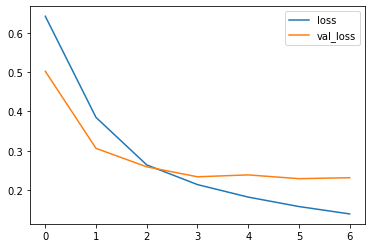

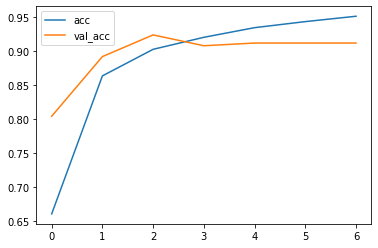

In [5]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()
plt.close()



In [6]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 0s 14us/sample - loss: 0.2685 - acc: 0.8910


[0.26846390610218046, 0.89096]

In [11]:
embedding = model.layers[0].get_weights()[0]
print(embedding)

[[-0.00224527  0.01233558 -0.00671492 ... -0.0158531   0.00094791
  -0.03423617]
 [ 0.02932385 -0.00368441 -0.03171558 ...  0.02837103 -0.08859491
   0.05949135]
 [ 0.0104681  -0.0059596  -0.04464321 ... -0.01519425 -0.12393993
   0.04903881]
 ...
 [ 0.03654797 -0.0363545   0.00865153 ... -0.01916582 -0.03453683
   0.0148139 ]
 [ 0.02065904 -0.03810325  0.01614388 ... -0.02315994 -0.04488129
   0.01660339]
 [ 0.08593863  0.08393868 -0.01497864 ... -0.03180826 -0.08863679
   0.07407412]]


In [71]:
import numpy

word_index = imdb.get_word_index()
print(word_index.get('bad'))
print(word_index.get('awful'))
reverse_index = { value:key for key, value in word_index.items() }

print(model.layers[0].get_weights()[0][word_index.get('bad')])

def to_vec(word):
    return model.layers[0].get_weights()[0][word_index.get(word) + 3]

w1 = model.layers[0].get_weights()[0][word_index.get('bad') + 3]
w2 = model.layers[0].get_weights()[0][word_index.get('awful') + 3]
w3 = model.layers[0].get_weights()[0][word_index.get('good') + 3]
w4 = model.layers[0].get_weights()[0][word_index.get('awesome') + 3]
w5 = model.layers[0].get_weights()[0][word_index.get('director') + 3]
w6 = model.layers[0].get_weights()[0][word_index.get('producer') + 3]

def compare(w1, w2):
    print(w1 + " vs " + w2, numpy.linalg.norm(to_vec(w1)-to_vec(w2)))

compare("bad", "awful")
compare("good", "great")
compare("good", "ok")
compare("awesome", "great")

def distance(w1, w2):
    return numpy.linalg.norm(to_vec(w1)-to_vec(w2))

def find_closest(word):
    min = 10000
    closest = ""
    for w, i in word_index.items():
        if (word_index.get(w) < max_features - 3 and w != word):
            d = distance(word, w)
            if (d < min):
                closest = w
                min = d
    return closest

# def print_closest(word):
#     print(word, find_closest)

# print(find_closest("good"))
print("good" == "good")
def print_it(word): 
    print(word, find_closest(word))

print_it("good")
print_it("bad")
print_it("actor")
print_it("director")




75
370
[ 0.00178532  0.00192943  0.02482763 -0.02814252  0.12129992  0.05736258
 -0.0276749  -0.02271799]
bad vs awful 0.9121339
good vs great 0.51627475
good vs ok 0.74294144
awesome vs great 0.10846315
True
good 90's
bad trite
actor fee
director clinic
